In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.metrics import r2_score

In [61]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\concrete_data.csv')

In [62]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [63]:
# extract x and y data set 
x=df.drop(columns=['Strength'])
y=df['Strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [65]:
lr=LinearRegression()

In [66]:
lr.fit(x_train,y_train)




LinearRegression()

In [67]:
y_pred=lr.predict(x_test)

In [68]:
print(r2_score(y_pred,y_test))
np.mean(cross_val_score(lr,x_train,y_train,scoring='r2',cv=10))

0.42317047978909683


0.5894185601991604

In [69]:
pw=PowerTransformer()
xtrain=pw.fit_transform(x_train)
xtest=pw.transform(x_test)

In [70]:
lr.fit(xtrain,y_train)
y_pred1=lr.predict(xtest)
r2_score(y_test,y_pred1)

0.8161906513354853

In [71]:
np.mean(cross_val_score(lr,xtrain,y_train,scoring='r2',cv=10))

0.7936885678901978

In [77]:
df2=pd.DataFrame(xtrain,columns=[x_train.columns])

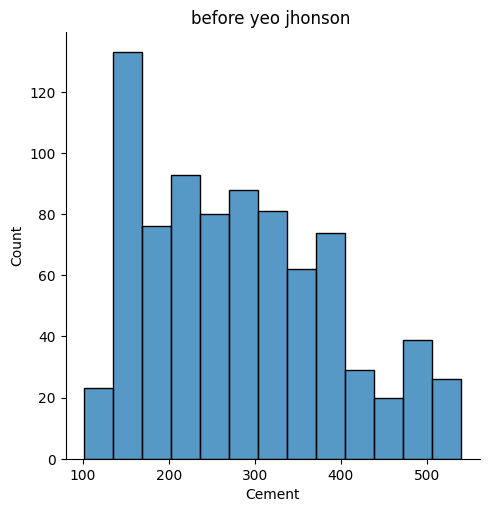

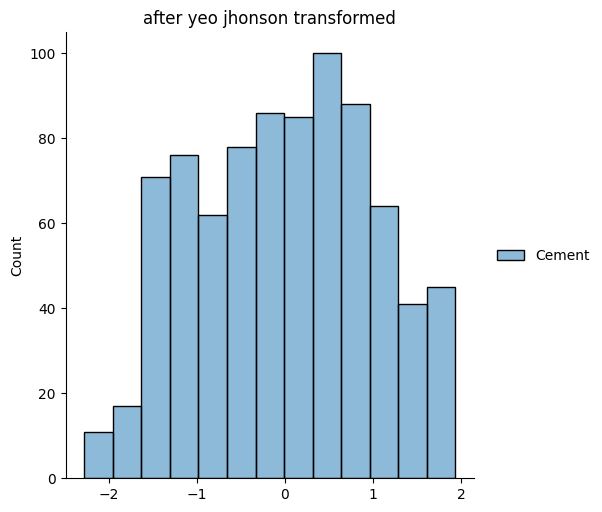

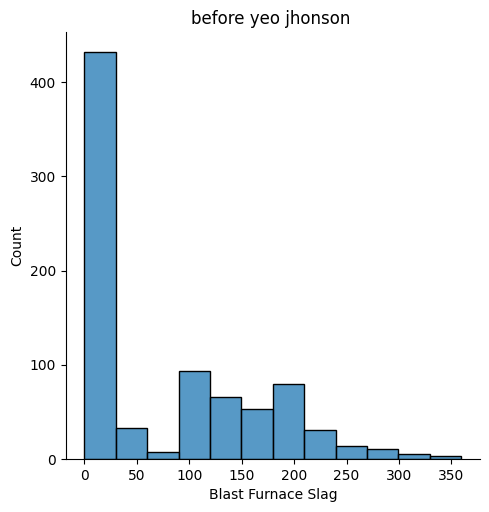

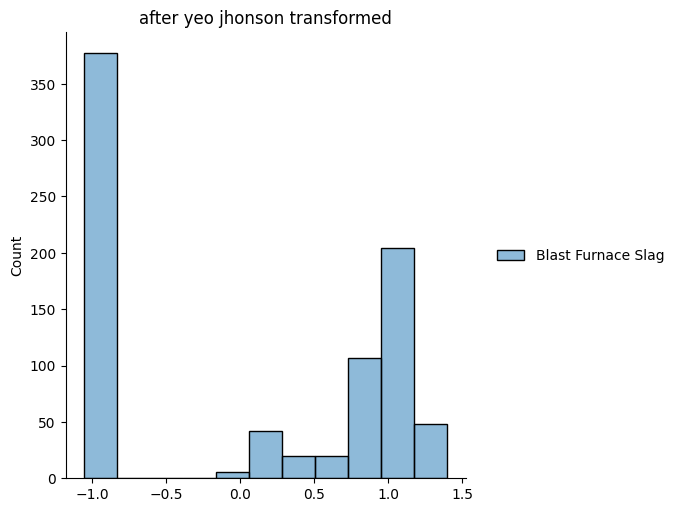

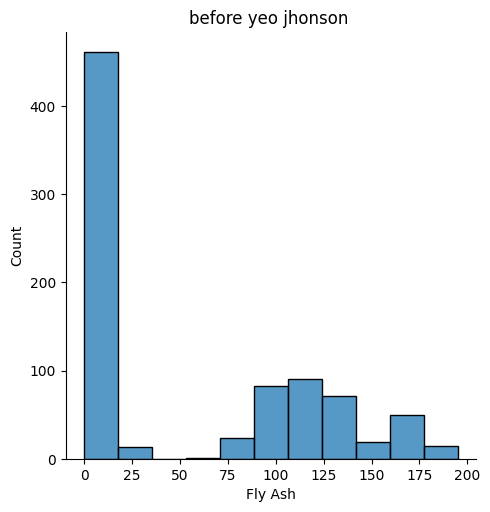

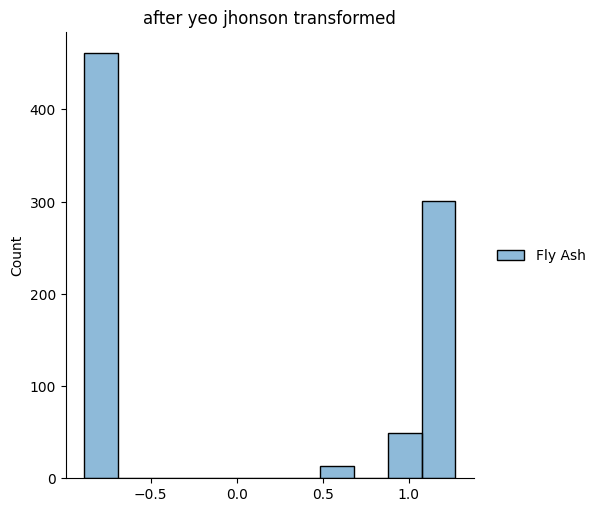

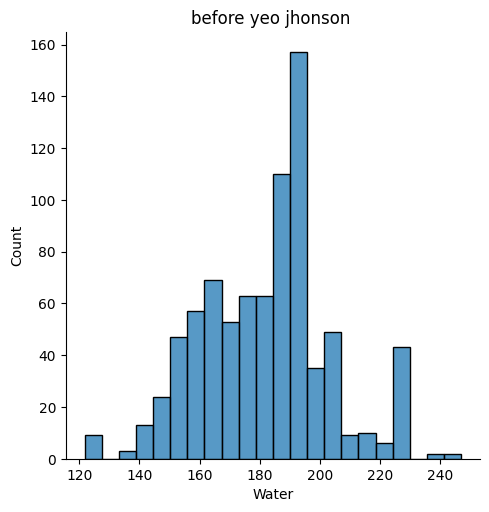

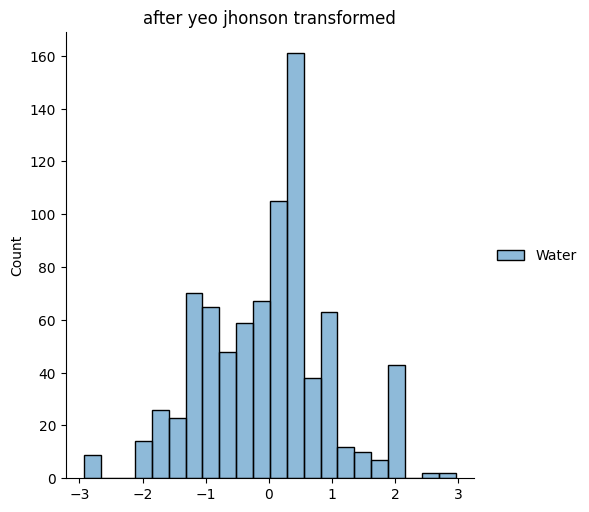

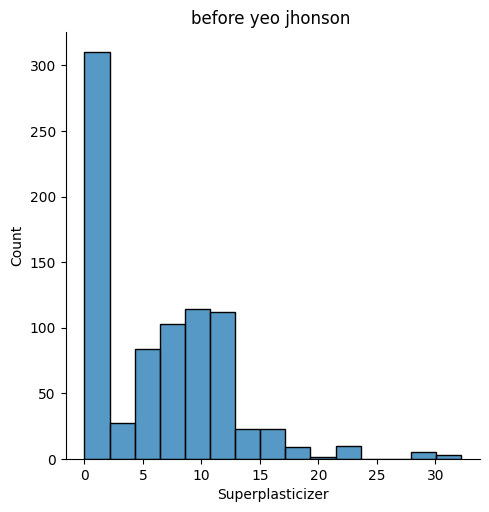

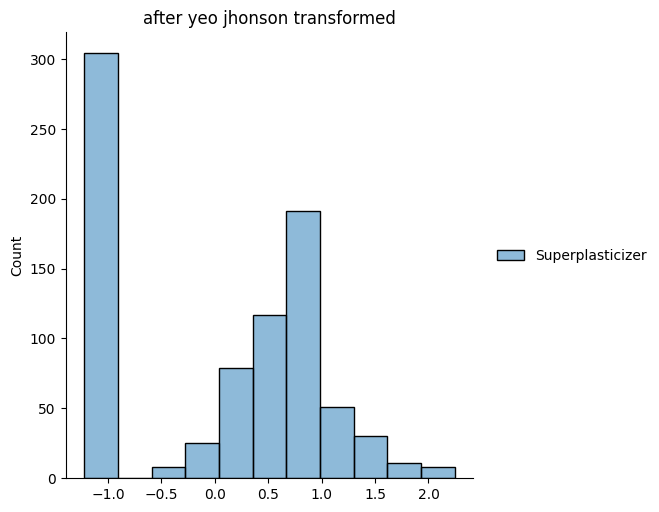

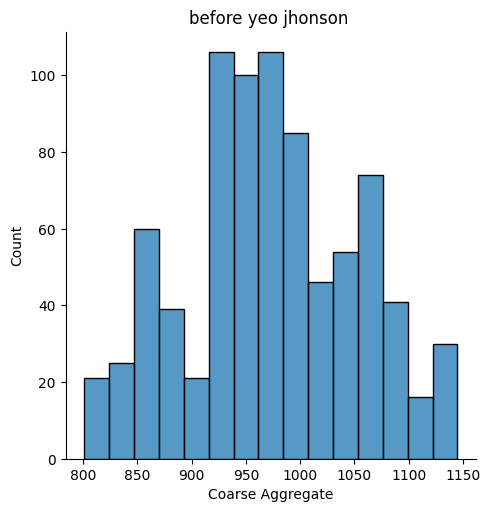

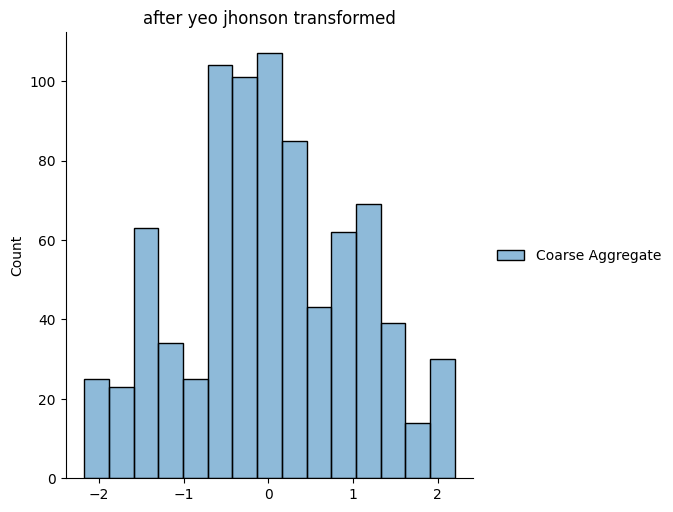

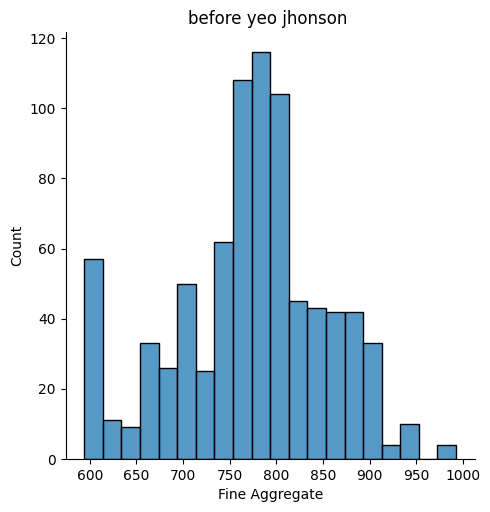

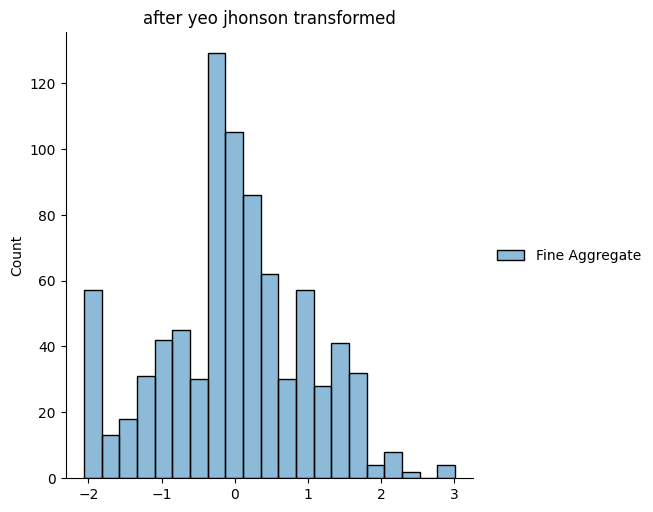

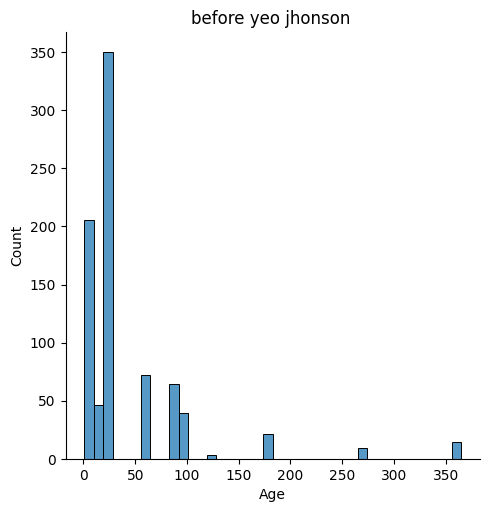

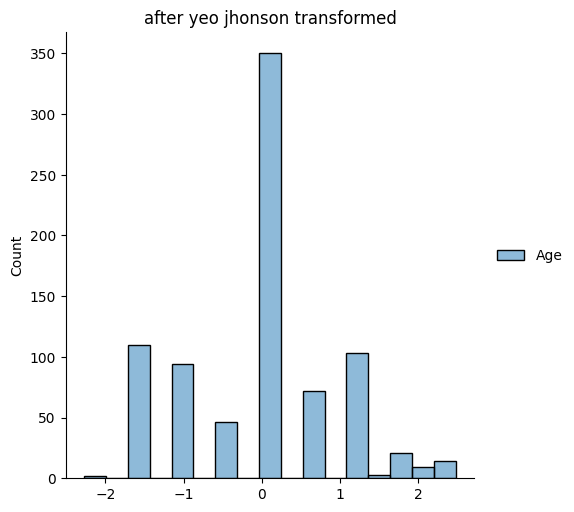

In [78]:
for col in x_train.columns:
    sns.displot(x_train[col])
    plt.title('before yeo jhonson ')

    sns.displot(df2[col],color='green')
    plt.title('after yeo jhonson transformed')
    plt.show()
    

In [79]:
pw.lambdas_

array([ 0.17434764,  0.01571519, -0.16144652,  0.77130676,  0.25393484,
        1.1300501 ,  1.78309974,  0.01988521])

In [81]:
lambdas_data =pd.DataFrame({'clos':x_train.columns,'lambdas':pw.lambdas_})
lambdas_data

,clos,lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885
